In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import math
import pandas as pd
import numpy as np
import time
import copy
import matplotlib.pyplot as plt

data = pd.read_csv("./1676558209_8416622_cleveland-train.csv")


In [2]:
X = data.drop('heartdisease::category|-1|1',axis = 1).to_numpy()
Y = data['heartdisease::category|-1|1'].values

In [3]:
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)
X_for_model = copy.deepcopy(X)
Y_for_model = copy.deepcopy(Y)

In [4]:
X.shape

(152, 13)

In [5]:
Y.shape
for i in range(len(Y)):
    if Y[i] == -1:
        Y[i] = 0

In [6]:
X = np.c_[np.ones((len(X), 1)), X]
X_Scaled = np.c_[np.ones((len(X_Scaled), 1)), X_Scaled]
X_Scaled = X_Scaled.T
X = X.T

In [7]:
X.shape

(14, 152)

In [8]:
# Computing prediction using signmoid function
def compute_predictions(W, X):
    z = np.matmul(W.T,X)
    predicted_values = 1.0/(1.0+np.exp(-z))
    return predicted_values

In [9]:
# Calculatin cross entropy loss
def compute_cost(predictions, actual):
    n = len(actual)
    temp1 = np.log(predictions)
    temp2 = np.log(1-predictions)
    cost = -(1/n)*np.sum(((actual*temp1) + ((1-actual)*(temp2))))
    return cost

In [10]:
# This functon finds the accuracy in percentage
def compute_accuracy(predictions, actual):
    total = 0 
    for i in range(len(actual)):
        if predictions[i] == actual[i]:
            total = total + 1
    
    accuracy = (total/len(actual))*100
    return accuracy

In [11]:
# This function assign classes 
def assign_classes(predictions):
    predicted_classes = np.zeros(len(predictions))
    
    for idx in range(len(predictions)):
        if predictions[idx] >= 0.5:
            predicted_classes[idx] = 1
        else:
            predicted_classes[idx] = 0
    return predicted_classes

In [12]:
def converged(gradients , threshold):
    for g in gradients:
        if abs(g) > threshold:
            return False
        
    return True

In [13]:
def assign_classes_original(predictions):    
    predicted_classes = np.zeros(len(predictions))
    
    for idx in range(len(predictions)):
        if predictions[idx] >= 0.5:
            predicted_classes[idx] = 1
        else:
            predicted_classes[idx] = -1
    return predicted_classes

In [14]:
def gradient_descent(X, Y, iterations, learning_rate, threshold):
    actual = Y
    costs = []
    w = np.zeros(X.shape[0])
    m = len(Y)
    no_iterations = 0
    
    for i in range(iterations):
        
        predictions = compute_predictions(w, X)
        cost = compute_cost(predictions, actual)
        costs.append(cost)
        errors = predictions - actual   
        gradients = (1/m)*np.matmul(X,errors)
        w = w - (learning_rate*gradients)
        no_iterations = no_iterations + 1
        
        if converged(gradients,threshold):
            break
            
        
    return w , costs ,no_iterations

Train Accuracy on 10000 Iterations :  69.07894736842105
Train Cost on 10000 Iterations:  0.5847145522443018
Time Taken to train the model on 10000 iterations:  0.12743400000000005


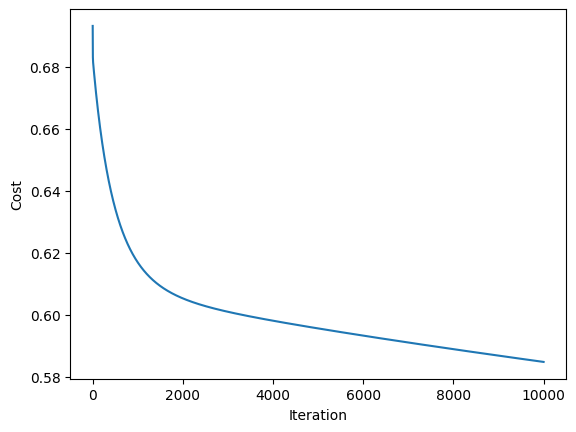

Train Accuracy on 100000 Iterations :  77.63157894736842
Entropy Cost on 100000 Iterations:  0.49370175927710563
Time Taken to train the model on 100000 iterations:  1.7182309999999998


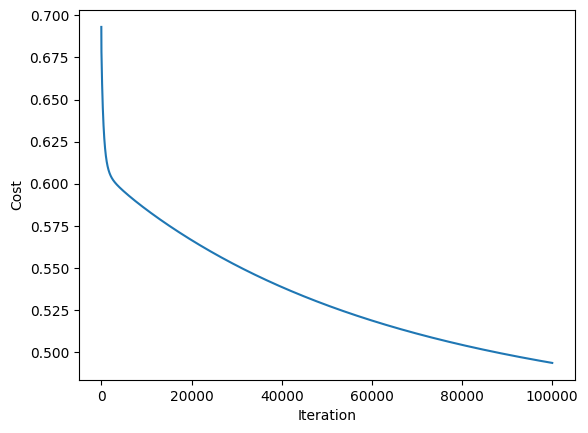

Accuracy on Millon Iterations :  84.86842105263158
Cost on 1000000 Iterations:  0.43535260915252544
Time Taken to train the model on Millon iterations:  13.016179000000001


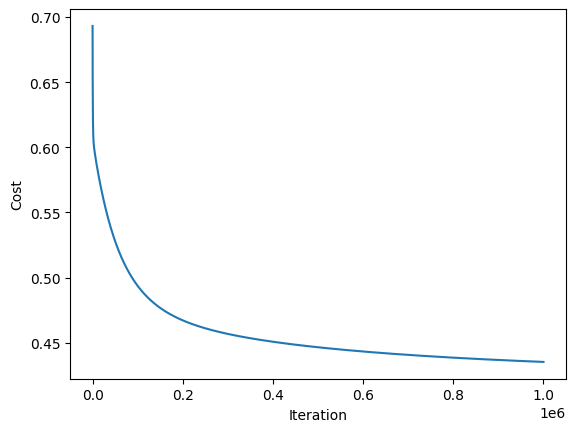

Accuracy from our library :  82.23684210526315
Time Taken to train the model from library:  0.08810000000000073
Accuracy on Scaled train data with learning rate 1e-05 and threshold 1e-03:  82.23684210526315
Number of Iterations on Scaled data with learning rate 1e-06 and threshold 1e-03:  1000000
Entropy Cost int this case:  0.4166924959018434
Accuracy on Scaled train data with learning rate 1e-04 and threshold 1e-03:   82.89473684210526
Number of Iterations on Scaled data with learning rate 1e-04 and threshold 1e-03:  670043
Entropy Cost in this case:  0.40742042916972354
Accuracy on Scaled train data with learning rate 1e-05 and threshold 1e-06: 82.23684210526315
Number of Iterations on Scaled data with learning rate 1e-04 and threshold 1e-06:  1000000
Entropy Cost in this case:  0.4166924959018434
Accuracy on Scaled train data with learning rate 1e-04 and threshold 1e-06: 82.89473684210526
Number of Iterations on Scaled data with learning rate 1e-04 and threshold 1e-06:  1000000
Ent

In [15]:
test_data = pd.read_csv('./1676558209_8421676_cleveland-test.csv')
X_test = test_data.to_numpy()
X_test_for_model = copy.deepcopy(X_test)
X_test = np.c_[np.ones((len(X_test), 1)), X_test]
X_test = X_test.T

# Learning Rate of 10^-5
learning_rate = 1e-05
threshold = 1e-03

# Running on 10000 iterations on Train Data
iterations = 10000
start = time.process_time()
params, costs ,no_iterations  = gradient_descent(X, Y, iterations, learning_rate,threshold)
train_time =time.process_time() - start
predictions = compute_predictions(params, X)
class_predictions = assign_classes(predictions)
accuracy_comp = compute_accuracy(class_predictions , Y)
print("Train Accuracy on 10000 Iterations : " , accuracy_comp)
print("Train Cost on 10000 Iterations: ", compute_cost(predictions, Y))
print("Time Taken to train the model on 10000 iterations: ", train_time)

#Plot Cost
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()


# Running  10000 iterations on Test Data
predictions = compute_predictions(params, X_test)
class_predictions = assign_classes_original(predictions).astype(int).astype(str)

fl = open("PredictionsWithTenThousand.csv","w")
for score in class_predictions:
    fl.write(score)
    fl.write("\n")

fl.close()
# print("Accuracy on 10000 Iterations : " , accuracy_comp)

####################################################################################################


# Running on 100000 iterations
iterations = 100000
start = time.process_time()
params, costs ,no_iterations = gradient_descent(X, Y, iterations, learning_rate,threshold)
train_time =time.process_time() - start
predictions = compute_predictions(params, X)
class_predictions = assign_classes(predictions)
accuracy_comp = compute_accuracy(class_predictions , Y)
print("Train Accuracy on 100000 Iterations : " , accuracy_comp)
print("Entropy Cost on 100000 Iterations: ", compute_cost(predictions, Y))
print("Time Taken to train the model on 100000 iterations: ", train_time)


#Plot Cost
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

# Running  100000 iterations on Test Data
predictions = compute_predictions(params, X_test)
class_predictions = assign_classes_original(predictions).astype(int).astype(str)

fl = open("PredictionsWithHundredThousand.csv","w")
for score in class_predictions:
    fl.write(score)
    fl.write("\n")
    
fl.close()

####################################################################################################

# Running on 1000000 iterations
iterations = 1000000
start = time.process_time()
params, costs ,no_iterations = gradient_descent(X, Y, iterations, learning_rate,threshold)
train_time =time.process_time() - start
predictions = compute_predictions(params, X)
class_predictions = assign_classes(predictions)
accuracy_comp = compute_accuracy(class_predictions , Y)
print("Accuracy on Millon Iterations : " , accuracy_comp)
print("Cost on 1000000 Iterations: ", compute_cost(predictions, Y))
print("Time Taken to train the model on Millon iterations: ", train_time)

#Plot Cost
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

# Running  100000 iterations on Test Data
predictions = compute_predictions(params, X_test)
class_predictions = assign_classes_original(predictions).astype(int).astype(str)

fl = open("PredictionsWithMillion.csv","w")
for score in class_predictions:
    fl.write(score)
    fl.write("\n")
    
fl.close()

####################################################################################################

# Running the model from library 
model = LogisticRegression(max_iter=1000000)
start = time.process_time()
model.fit(X_for_model, Y_for_model)
train_time =time.process_time() - start
predictedY = model.predict(X_for_model)
accuracy_lib = compute_accuracy(predictedY , Y_for_model)
print("Accuracy from our library : " , accuracy_lib)
print("Time Taken to train the model from library: ", train_time)

#Running model from library on testing data
predictedY_test = model.predict(X_test_for_model).astype(int).astype(str)

fl = open("PredictionOnTestFromLib.csv","w")
for score in predictedY_test:
    fl.write(score)
    fl.write("\n")
    
fl.close()


####################################################################################################


#Running on Scaled data with learning rate 10^-5 and gradient theshold 10^-3
iterations = 1000000
learning_rate = 1e-05
params, costs ,no_iterations = gradient_descent(X_Scaled, Y, iterations, learning_rate, threshold)
predictions = compute_predictions(params, X_Scaled)
class_predictions = assign_classes(predictions)
accuracy_comp = compute_accuracy(class_predictions , Y)
print("Accuracy on Scaled train data with learning rate 1e-05 and threshold 1e-03: " , accuracy_comp)
print("Number of Iterations on Scaled data with learning rate 1e-06 and threshold 1e-03: " , no_iterations)
print("Entropy Cost int this case: ", compute_cost(predictions, Y))

####################################################################################################

#Running on Scaled data with learning rate 10^-4 and gradient theshold 10^-3
iterations = 1000000
learning_rate = 1e-04
params, costs ,no_iterations = gradient_descent(X_Scaled, Y, iterations, learning_rate, threshold)
predictions = compute_predictions(params, X_Scaled)
class_predictions = assign_classes(predictions)
accuracy_comp = compute_accuracy(class_predictions , Y)
print("Accuracy on Scaled train data with learning rate 1e-04 and threshold 1e-03:  " , accuracy_comp)
print("Number of Iterations on Scaled data with learning rate 1e-04 and threshold 1e-03: " , no_iterations)
print("Entropy Cost in this case: ", compute_cost(predictions, Y))

###################################################################################################

#Running on Scaled data with learning rate 10^-5 and gradient theshold 10^-6
iterations = 1000000
learning_rate = 1e-05
threshold = 1e-6
params, costs ,no_iterations = gradient_descent(X_Scaled, Y, iterations, learning_rate, threshold)
predictions = compute_predictions(params, X_Scaled)
class_predictions = assign_classes(predictions)
accuracy_comp = compute_accuracy(class_predictions , Y)
print("Accuracy on Scaled train data with learning rate 1e-05 and threshold 1e-06:" , accuracy_comp)
print("Number of Iterations on Scaled data with learning rate 1e-04 and threshold 1e-06: " , no_iterations)
print("Entropy Cost in this case: ", compute_cost(predictions, Y))


###################################################################################################

#Running on Scaled data with learning rate 10^-4 and gradient theshold 10^-6
iterations = 1000000
learning_rate = 1e-04
threshold = 1e-6
params, costs ,no_iterations = gradient_descent(X_Scaled, Y, iterations, learning_rate, threshold)
predictions = compute_predictions(params, X_Scaled)
class_predictions = assign_classes(predictions)
accuracy_comp = compute_accuracy(class_predictions , Y)
print("Accuracy on Scaled train data with learning rate 1e-04 and threshold 1e-06:" , accuracy_comp)
print("Number of Iterations on Scaled data with learning rate 1e-04 and threshold 1e-06: " , no_iterations)
print("Entropy Cost in this case: ", compute_cost(predictions, Y))

###################################################################################################

#Running on Scaled data with learning rate 10^-3 and gradient theshold 10^-6
iterations = 1000000
learning_rate = 1e-03
threshold = 1e-6
params, costs ,no_iterations = gradient_descent(X_Scaled, Y, iterations, learning_rate,threshold)
predictions = compute_predictions(params, X_Scaled)
class_predictions = assign_classes(predictions)
accuracy_comp = compute_accuracy(class_predictions , Y)
print("Accuracy on Scaled train data with learning rate 1e-03 and threshold 1e-06:" , accuracy_comp)
print("Number of Iterations on Scaled data with learning rate 1e-03 and threshold 1e-06: " , no_iterations)
print("Entropy Cost in this case: ", compute_cost(predictions, Y))
print("Done!")